# 1. Imports

In [15]:
# Basic Libraries
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation and analysis

# Data Visualization
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Advanced visualizations

# Preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV  # Splitting data and hyperparameter tuning
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder  # Data scaling and encoding
from sklearn.impute import SimpleImputer  # Handling missing data
from sklearn.compose import ColumnTransformer  # For column-based transformations
from sklearn.pipeline import Pipeline  # To streamline processing workflows

# Machine Learning Models
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier  # Random Forest, Bagging Classifier
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from xgboost import XGBClassifier  # XGBoost
import xgboost as xgb
# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation metrics
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score  # Other performance metrics

# Handling Imbalanced Datasets
from imblearn.over_sampling import SMOTE  # Synthetic data generation for balancing classes

# Statistical Analysis
import scipy.stats as stats  # Statistical functions
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF for multicollinearity
from statsmodels.tools.tools import add_constant  # Add constant to model

# Working with Files and Directories
import os  # File and directory management

# Handling Warnings
import warnings  # Suppress warnings
warnings.filterwarnings('ignore')  # Ignore warnings globally

# Deep Learning
from tensorflow.keras.models import Sequential  # Building models
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D  # Model layers
from tensorflow.keras.optimizers import Adam  # Optimizers
from tensorflow.keras.utils import to_categorical  # One-hot encoding

# IPython Display (for Jupyter Notebooks)
from IPython.display import display, HTML  # Display HTML content

# 2. Load datasets

This code loads six CSV files containing datasets for three years (2021, 2022, and 2023) into Pandas DataFrames. The datasets are stored in two categories: "original" and "preprocessed," with the file paths provided as raw strings. These DataFrames are then assigned to variables for further processing in the analysis.

In [2]:
# Load datasets using raw strings
year_2021_copy = pd.read_csv(r'Preprocessed-Supervised\year_original\year2021original.csv')
year_2022_copy = pd.read_csv(r'Preprocessed-Supervised\year_original\year2022original.csv')
year_2023_copy = pd.read_csv(r'Preprocessed-Supervised\year_original\year2023original.csv')

year_2021 = pd.read_csv(r'Preprocessed-Supervised\year_preprocessed\year2021preprocessed.csv')
year_2022 = pd.read_csv(r'Preprocessed-Supervised\year_preprocessed\year2022preprocessed.csv')
year_2023 = pd.read_csv(r'Preprocessed-Supervised\year_preprocessed\year2023preprocessed.csv')

## 2.1. Load Original Yearly Datasets

### 2.1.1. Load Original 2021 Yearly Dataset

In [5]:
year_2021_copy

,NDVI01,NDVI02,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI11,label
0,0.301939,0.167305,0.341328,0.720096,0.415395,0.610263,0.616280,0.619938,0.642822,0
1,0.259349,0.113366,0.417741,0.472688,0.574449,0.719706,0.741016,0.728066,0.654416,0
2,0.156574,0.124701,0.195888,0.160872,0.180177,0.612334,0.626688,0.315211,0.454599,0
3,0.174253,0.132007,0.403952,0.647858,0.738467,0.866004,0.828717,0.566910,0.607211,0
4,0.112775,0.117325,0.587236,0.428035,0.749978,0.753427,0.734077,0.634173,0.641756,0
...,...,...,...,...,...,...,...,...,...,...
2542,0.286859,0.069584,0.743293,0.296186,0.746202,0.905347,0.182095,0.145312,0.942406,1
2543,0.184232,0.079904,0.781771,0.398850,0.107834,0.775156,0.371923,0.698553,0.903138,1
2544,0.260446,0.389773,0.842464,0.371244,0.127478,0.149055,0.120610,0.433063,0.823678,1
2545,0.218682,0.131698,0.342250,0.237856,0.691909,0.912754,0.836669,0.769351,0.191069,1


### 2.1.2. Load Original 2022 Yearly Dataset

In [6]:
year_2022_copy

,NDVI01,NDVI02,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI11,label
0,0.144797,0.212233,0.502676,0.822877,0.126923,0.710017,0.568446,0.653615,0.542401,0
1,0.295738,0.648260,0.414296,0.561556,0.125296,0.516686,0.403593,0.471011,0.406043,0
2,0.186430,0.253124,0.527558,0.563504,0.185853,0.740853,0.626203,0.872950,0.708536,0
3,0.152861,0.205556,0.447433,0.497985,0.154161,0.620843,0.650218,0.845629,0.721148,0
4,0.127139,0.197911,0.520831,0.685481,0.150047,0.521320,0.608162,0.833790,0.721143,0
...,...,...,...,...,...,...,...,...,...,...
16072,0.374734,0.439221,0.456375,0.506073,0.468296,0.636432,0.739640,0.656983,0.107759,1
16073,0.138553,0.162900,0.380911,0.662719,0.731032,0.745647,0.589458,0.647913,0.436949,1
16074,0.125317,0.313898,0.723439,0.945973,0.879634,0.795832,0.584066,0.359310,0.007449,1
16075,0.089211,0.170124,0.624788,0.620969,0.665946,0.506011,0.460131,0.169383,0.056356,1


### 2.1.3. Load Original 2023 Yearly Dataset

In [7]:
year_2023_copy

,NDVI01,NDVI02,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI11,label
0,0.148316,0.287237,0.631947,0.502032,0.318688,0.634128,0.611122,0.671379,0.606217,0
1,0.146091,0.249730,0.369665,0.374452,0.331693,0.490948,0.506473,0.580809,0.536688,0
2,0.131509,0.398526,0.778236,0.808614,0.332347,0.807638,0.711362,0.790639,0.705825,0
3,0.110571,0.115171,0.856764,0.834004,0.375605,0.842070,0.721370,0.784468,0.670187,0
4,0.127324,0.111281,0.679139,0.717781,0.444205,0.811260,0.744066,0.786986,0.691576,0
...,...,...,...,...,...,...,...,...,...,...
11565,0.457927,0.639211,0.932249,0.753174,0.535501,0.882530,0.555877,0.839320,0.938874,1
11566,0.460389,0.623097,0.903137,0.716148,0.520036,0.885023,0.513794,0.834160,0.948671,1
11567,0.511788,0.620283,0.896923,0.764131,0.513109,0.888102,0.580060,0.831705,0.950424,1
11568,0.479887,0.558507,0.920550,0.784360,0.489771,0.893638,0.497149,0.796727,0.942815,1


## 2.2. Load Preprocessed Yearly Datasets

### 2.2.1. Load Preprocessed 2021 Yearly Dataset

In [8]:
year_2021

,NDVI01,NDVI02,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI11,label
0,0.118654,0.061301,0.296416,0.364417,0.483421,0.591871,0.515154,0.445364,0.399586,0
1,0.197226,0.180429,0.568125,0.576981,0.415207,0.739863,0.700931,0.453635,0.347205,0
2,0.144007,0.136038,0.143959,0.268391,0.116757,0.489354,0.656887,0.605676,0.306019,0
3,0.232960,0.351217,0.529936,0.383636,0.750119,0.635616,0.836468,0.812776,0.666229,0
4,0.254293,0.380212,0.546494,0.636995,0.222186,0.594494,0.509203,0.600470,0.558964,0
...,...,...,...,...,...,...,...,...,...,...
19971,0.165138,0.105500,0.420756,0.233279,0.182362,0.816925,0.537268,0.450838,0.834892,1
19972,0.241421,0.480679,0.416419,0.595790,0.461717,0.857852,0.810652,0.622681,0.700525,1
19973,0.172824,0.089574,0.834651,0.386781,0.236849,0.771576,0.189223,0.466900,0.970832,1
19974,0.260008,0.107706,0.868773,0.491521,0.289783,0.867977,0.427116,0.112557,0.455306,1


### 2.2.2. Load Preprocessed 2022 Yearly Dataset

In [9]:
year_2022

,NDVI01,NDVI02,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI11,label
0,0.034808,0.040377,0.043114,0.146769,0.149037,0.374429,0.524516,0.399321,0.245464,0
1,0.175532,0.185437,0.269122,0.678563,0.391193,0.395850,0.633506,0.706910,0.491873,0
2,0.545482,0.592162,0.270198,0.309798,0.120292,0.395173,0.227925,0.222468,0.250041,0
3,0.660228,0.378799,0.352096,0.529348,0.491382,0.629837,0.567934,0.430877,0.416306,0
4,0.172566,0.115839,0.080634,0.152332,0.445368,0.336307,0.250035,0.137569,0.075962,0
...,...,...,...,...,...,...,...,...,...,...
19971,0.381534,0.646039,0.626910,0.969844,0.274460,0.521855,0.784862,0.532815,0.653015,1
19972,0.147277,0.095146,0.379187,0.599889,0.745138,0.519425,0.398159,0.739122,0.899326,1
19973,0.086257,0.102671,0.078142,0.200912,0.225114,0.309912,0.114683,0.384081,0.851750,1
19974,0.147513,0.225546,0.795242,0.424647,0.529372,0.440649,0.151330,0.390381,0.886590,1


### 2.2.3. Load Preprocessed 2023 Yearly Dataset

In [10]:
year_2023

,NDVI01,NDVI02,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI11,label
0,0.121185,0.121326,0.561443,0.731940,0.761886,0.775566,0.596933,0.597863,0.617199,0
1,0.175690,0.129444,0.165066,0.837510,0.586746,0.843034,0.622596,0.576916,0.297971,0
2,0.428108,0.431751,0.550961,0.578461,0.673456,0.553740,0.446206,0.520343,0.599034,0
3,0.138639,0.149708,0.071141,0.149012,0.523083,0.320732,0.260344,0.113060,0.269443,0
4,0.453020,0.365634,0.469600,0.548364,0.351604,0.508584,0.494197,0.544754,0.574080,0
...,...,...,...,...,...,...,...,...,...,...
19971,0.483899,0.512283,0.710786,0.739360,0.523654,0.383179,0.536376,0.702349,0.835241,1
19972,0.703810,0.635542,0.891318,0.877593,0.581896,0.431076,0.567309,0.728252,0.855908,1
19973,0.198317,0.417130,0.838922,0.910547,0.707830,0.531332,0.310356,0.396445,0.896679,1
19974,0.201888,0.099996,0.079207,0.068615,0.365091,0.691295,0.943765,0.924363,0.861990,1


# 3. Function For Evaluation Matrix

The evaluate_model function computes and displays various metrics to assess model performance, including accuracy, classification report, confusion matrix, and ROC curve. It uses accuracy_score, classification_report, and confusion_matrix for the text-based metrics, while plotting the confusion matrix and ROC curve with the help of matplotlib and seaborn for visual evaluation.

In [16]:
# Define a function to evaluate model performance
def evaluate_model(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    
    # Print accuracy
    print(f"Accuracy: {accuracy}")
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    
    # Plot confusion matrix using matplotlib and seaborn
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()


# 4. XGBoost (Extreme Gradient Boosting)

## 4.1. Simple Cross Validation

The plot_feature_importance function visualizes the top 10 most important features based on the trained model's feature importances. It sorts the features by their importance scores and then displays them in a horizontal bar chart. Additionally, the train_test_model function trains an XGBoost classifier on the concatenated training data, evaluates its performance, and plots feature importance.

Training on year_2021 and year_2022, Testing on year_2023_copy
Accuracy: 0.9090751944684529
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     10689
           1       0.45      0.83      0.58       881

    accuracy                           0.91     11570
   macro avg       0.72      0.87      0.77     11570
weighted avg       0.94      0.91      0.92     11570



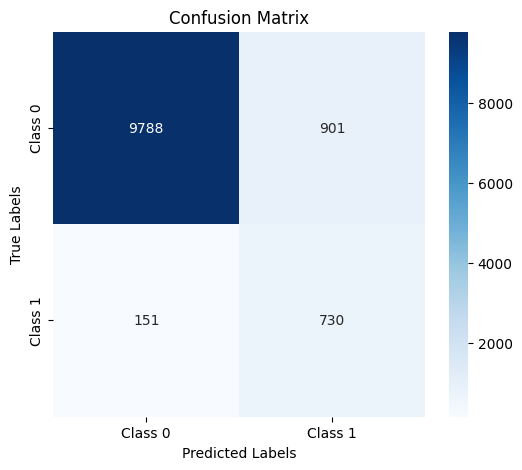

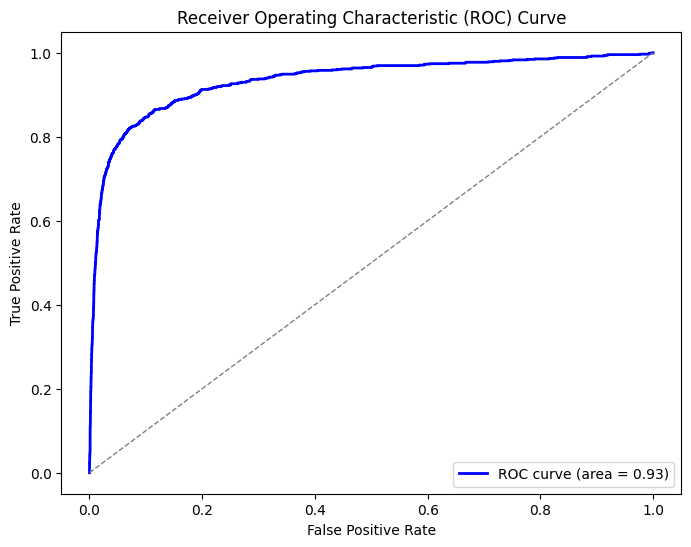

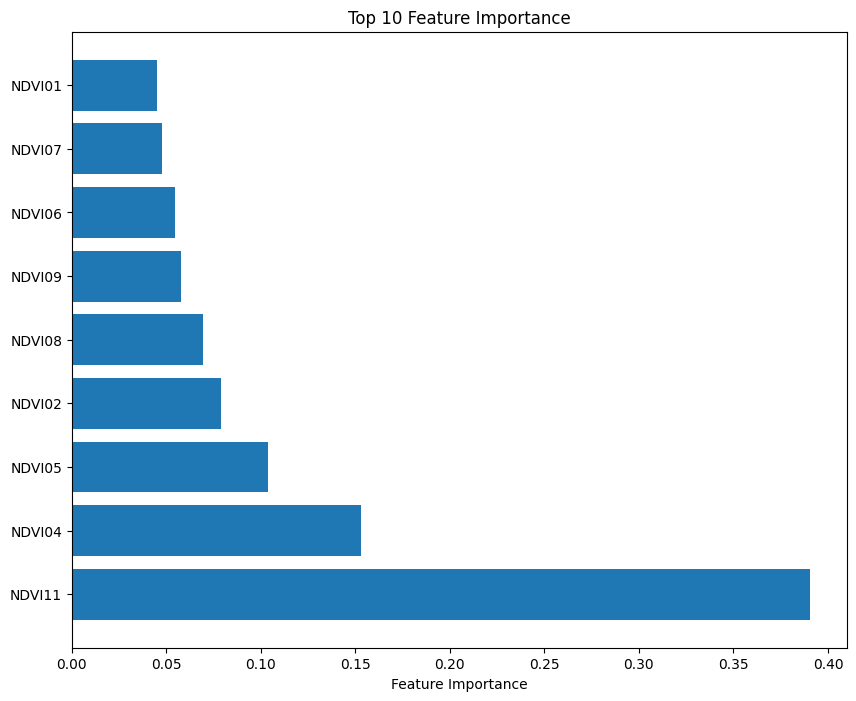


Training on year_2021 and year_2023, Testing on year_2022_copy
Accuracy: 0.8581202960751384
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     11751
           1       0.84      0.58      0.69      4326

    accuracy                           0.86     16077
   macro avg       0.85      0.77      0.80     16077
weighted avg       0.86      0.86      0.85     16077



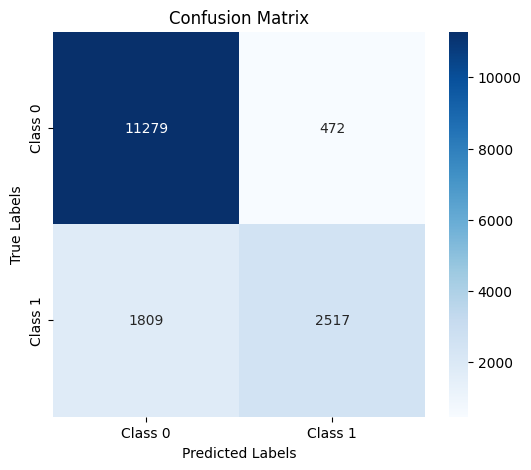

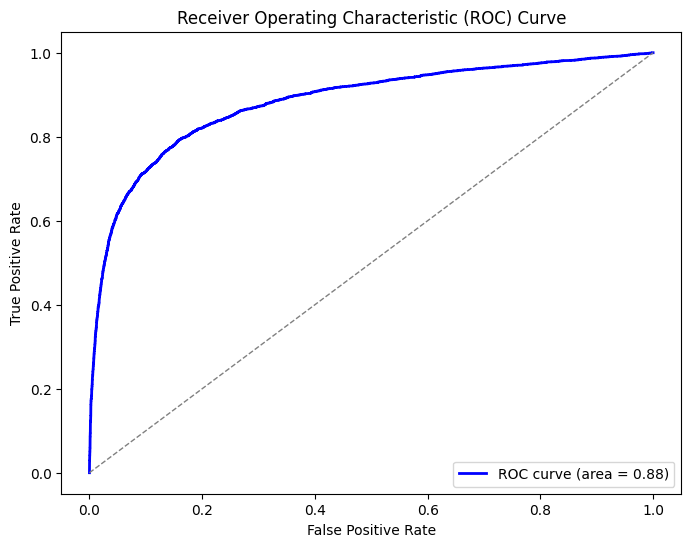

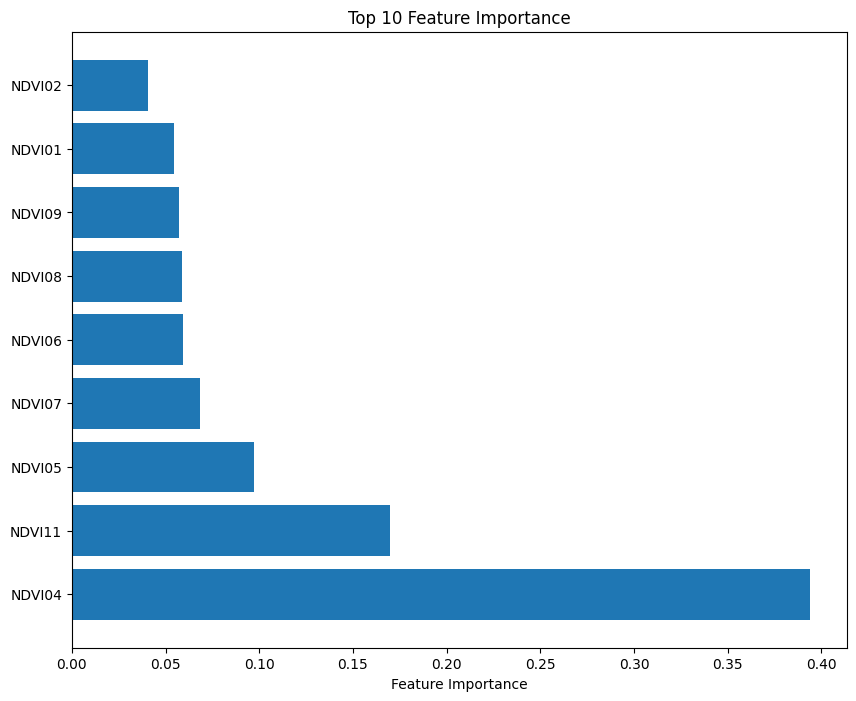


Training on year_2022 and year_2023, Testing on year_2021_copy
Accuracy: 0.8621908127208481
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2150
           1       0.55      0.65      0.60       397

    accuracy                           0.86      2547
   macro avg       0.74      0.78      0.76      2547
weighted avg       0.87      0.86      0.87      2547



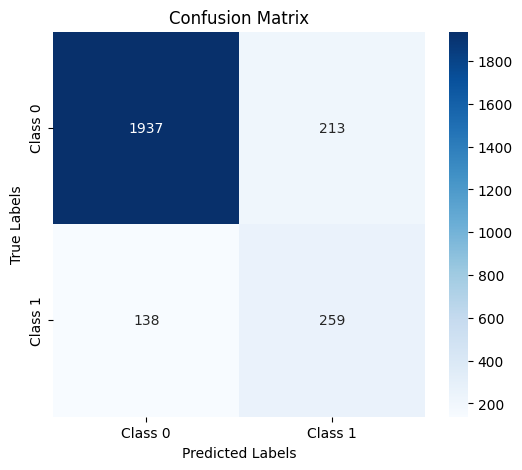

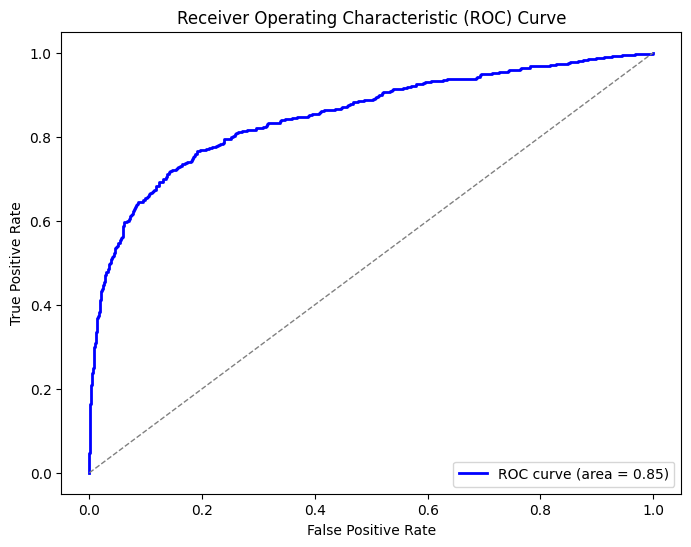

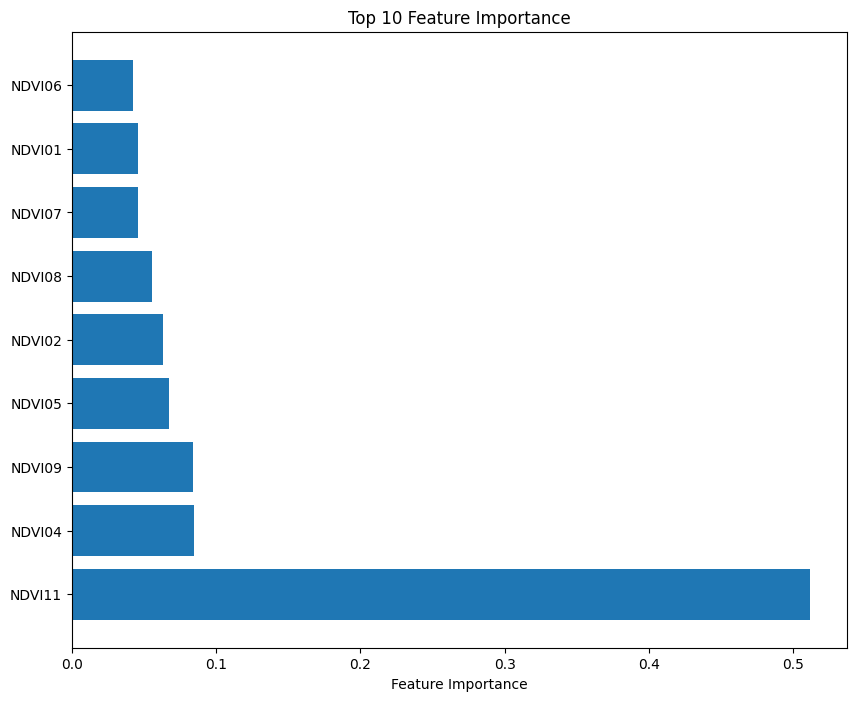

In [12]:
# Function to plot feature importance using Random Forest
def plot_feature_importance(model):
    # Get feature importances from the model
    importances = model.feature_importances_
    
    # Get the feature names
    feature_names = model.feature_names_in_
    
    # Sort the features by importance
    indices = importances.argsort()[::-1]
    
    # Plot the feature importance
    plt.figure(figsize=(10, 8))
    plt.barh(range(9), importances[indices][:9], align="center")
    plt.yticks(range(9), feature_names[indices][:9])
    plt.xlabel("Feature Importance")
    plt.title("Top 10 Feature Importance")
    plt.show()

# Function to perform training and testing
def train_test_model(train_data_1, train_data_2, test_data, label_column):
    # Concatenate train data from two years
    train_data = pd.concat([train_data_1, train_data_2])
    
    # Split features and labels
    X_train = train_data.drop(columns=[label_column])
    y_train = train_data[label_column]
    
    X_test = test_data.drop(columns=[label_column])
    y_test = test_data[label_column]
    
    # Initialize XGBoost classifier
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the test set results
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    
    # Evaluate the model
    evaluate_model(y_test, y_pred, y_prob)
    
    # Plot feature importance
    plot_feature_importance(model)

# Test case 1: Train on year_2021 and year_2022, test on year_2023_copy
print("Training on year_2021 and year_2022, Testing on year_2023_copy")
train_test_model(year_2021, year_2022, year_2023_copy, 'label')

# Test case 2: Train on year_2022 and year_2023, test on year_2022_copy
print("\nTraining on year_2021 and year_2023, Testing on year_2022_copy")
train_test_model(year_2021, year_2023, year_2022_copy, 'label')

# Test case 3: Train on year_2022 and year_2023, test on year_2021_copy
print("\nTraining on year_2022 and year_2023, Testing on year_2021_copy")
train_test_model(year_2022, year_2023, year_2021_copy, 'label')


## 4.2. Grid Search Cross Validation

The train_test_model_with_grid_search function performs model training using XGBoost along with hyperparameter optimization using GridSearchCV. It concatenates the training data from two years, splits it into features and labels, and applies GridSearchCV to find the best hyperparameters based on accuracy using 5-fold cross-validation. After determining the best model, it evaluates the performance on the test set and outputs evaluation metrics.

Training on year_2021 and year_2022, Testing on year_2023_copy
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters found by GridSearchCV:
{'learning_rate': 0.4, 'max_depth': 7, 'n_estimators': 175}
Accuracy: 0.9065687121866897
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     10689
           1       0.44      0.83      0.57       881

    accuracy                           0.91     11570
   macro avg       0.71      0.87      0.76     11570
weighted avg       0.94      0.91      0.92     11570



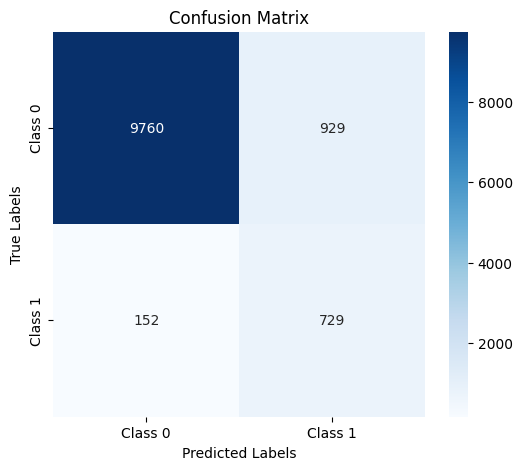

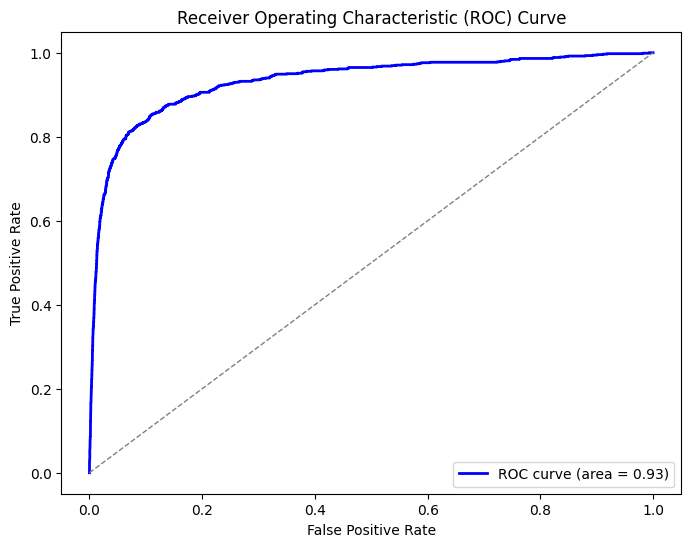


Training on year_2021 and year_2023, Testing on year_2022_copy
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters found by GridSearchCV:
{'learning_rate': 0.4, 'max_depth': 8, 'n_estimators': 175}
Accuracy: 0.8591155066243702
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     11751
           1       0.83      0.60      0.69      4326

    accuracy                           0.86     16077
   macro avg       0.85      0.78      0.80     16077
weighted avg       0.86      0.86      0.85     16077



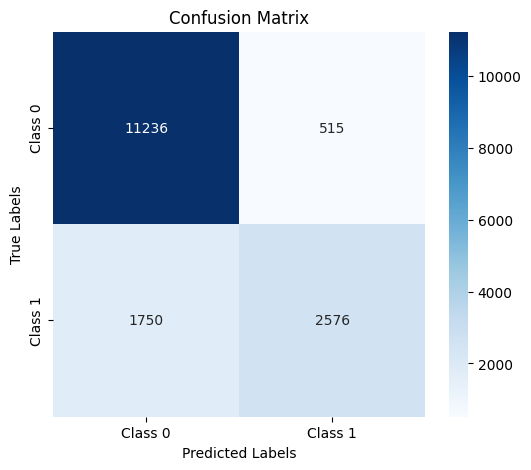

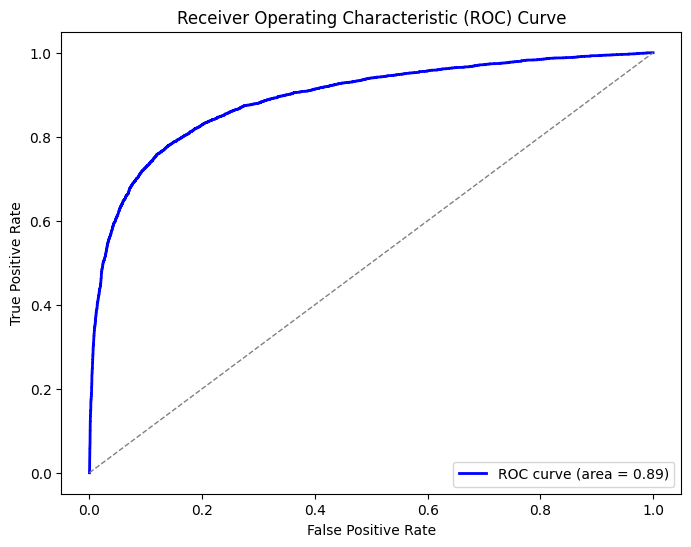


Training on year_2022 and year_2023, Testing on year_2021_copy
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters found by GridSearchCV:
{'learning_rate': 0.4, 'max_depth': 8, 'n_estimators': 175}
Accuracy: 0.8755398508048685
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2150
           1       0.59      0.67      0.63       397

    accuracy                           0.88      2547
   macro avg       0.76      0.79      0.78      2547
weighted avg       0.88      0.88      0.88      2547



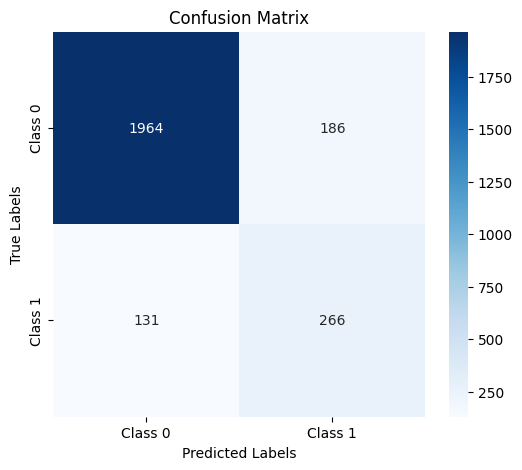

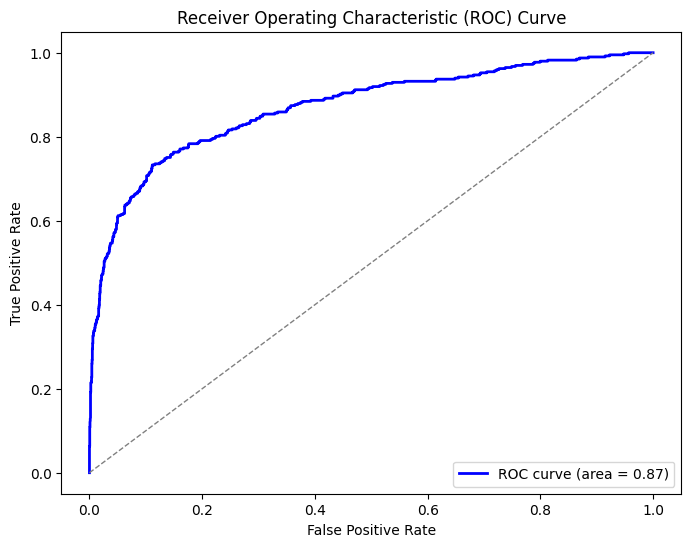

In [13]:
# Function to perform training and testing with GridSearchCV for hyperparameter optimization
def train_test_model_with_grid_search(train_data_1, train_data_2, test_data, label_column):
    # Concatenate train data from two years
    train_data = pd.concat([train_data_1, train_data_2])
    
    # Split features and labels
    X_train = train_data.drop(columns=[label_column])
    y_train = train_data[label_column]
    
    X_test = test_data.drop(columns=[label_column])
    y_test = test_data[label_column]
    
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.2, 0.4],
        'max_depth': [5, 6, 7, 8],
        'n_estimators': [100, 150, 175]
    }
    
    # Initialize XGBoost classifier
    model = xgb.XGBClassifier()
    
    # Initialize GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    
    # Train the model using GridSearchCV
    grid_search.fit(X_train, y_train, eval_metric='mlogloss')
    
    # Get the best parameters from GridSearchCV
    print("Best Parameters found by GridSearchCV:")
    print(grid_search.best_params_)
    
    # Train the model with the best parameters
    best_model = grid_search.best_estimator_
    
    # Predict the test set results
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)
    
    # Evaluate the model
    evaluate_model(y_test, y_pred, y_prob)

# Test case 1: Train on year_2021 and year_2022, test on year_2023_copy
print("Training on year_2021 and year_2022, Testing on year_2023_copy")
train_test_model_with_grid_search(year_2021, year_2022, year_2023_copy, 'label')

# Test case 2: Train on year_2021 and year_2023, test on year_2022_copy
print("\nTraining on year_2021 and year_2023, Testing on year_2022_copy")
train_test_model_with_grid_search(year_2021, year_2023, year_2022_copy, 'label')

# Test case 3: Train on year_2022 and year_2023, test on year_2021_copy
print("\nTraining on year_2022 and year_2023, Testing on year_2021_copy")
train_test_model_with_grid_search(year_2022, year_2023, year_2021_copy, 'label')


# 5. Random Forest

## 5.1. Simple Cross Validation

The code defines two functions: one to train and test a Random Forest model on combined data from two years, evaluate its performance, and plot feature importance; and another to visualize the top 10 most important features using a horizontal bar plot. Three test cases evaluate the model's performance using different year combinations for training and testing.

Training on year_2021 and year_2022, Testing on year_2023_copy
Accuracy: 0.9288677614520311
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     10689
           1       0.52      0.82      0.64       881

    accuracy                           0.93     11570
   macro avg       0.75      0.88      0.80     11570
weighted avg       0.95      0.93      0.94     11570



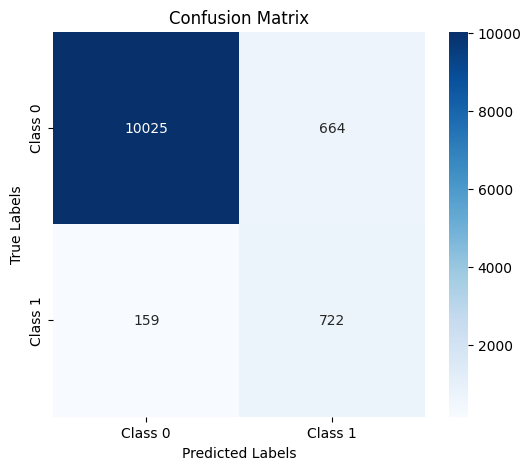

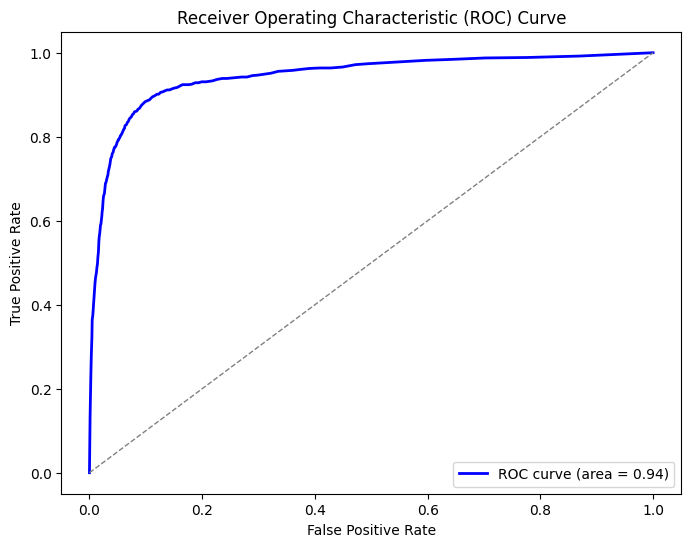

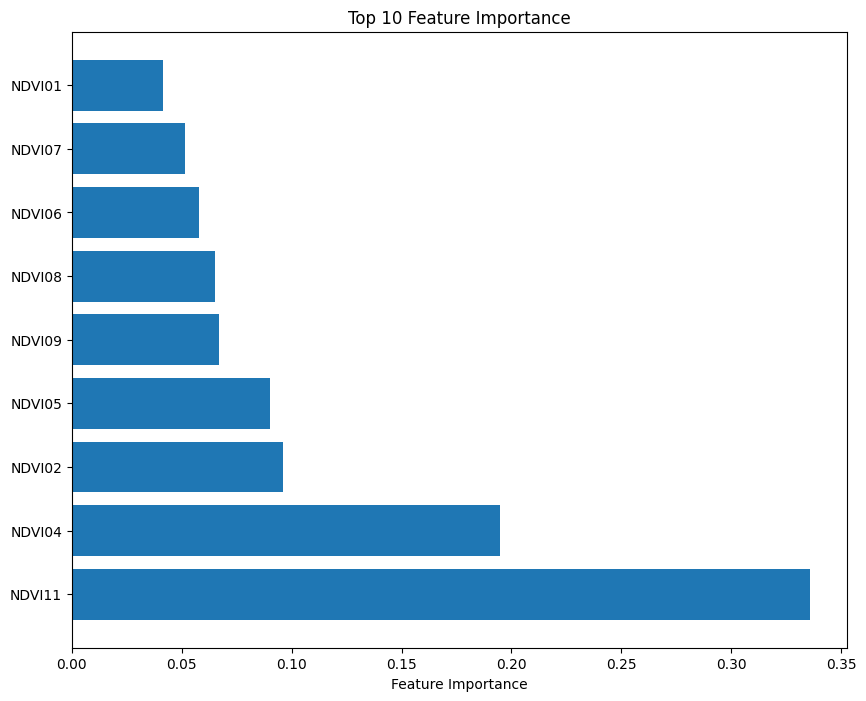


Training on year_2021 and year_2023, Testing on year_2022_copy
Accuracy: 0.8447471543198358
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     11751
           1       0.91      0.47      0.62      4326

    accuracy                           0.84     16077
   macro avg       0.87      0.73      0.76     16077
weighted avg       0.86      0.84      0.83     16077



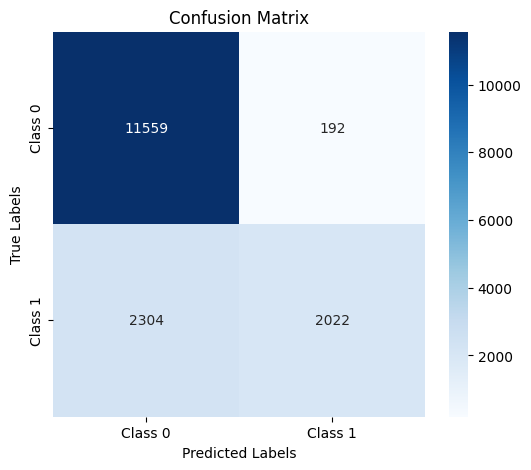

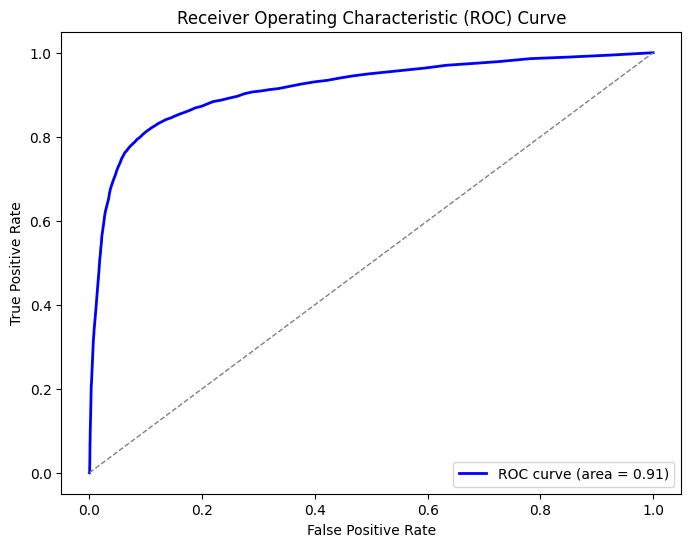

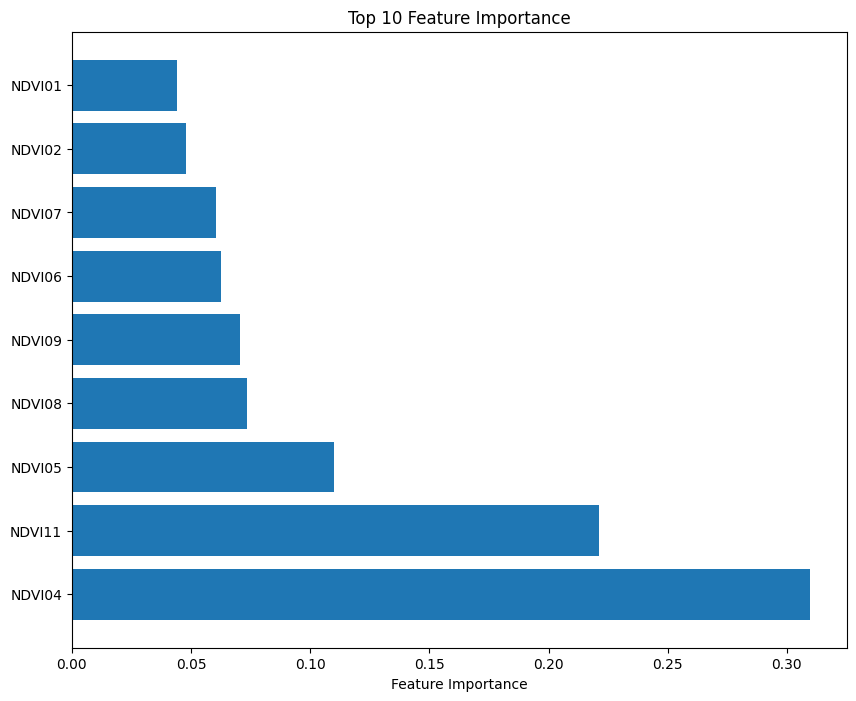


Training on year_2022 and year_2023, Testing on year_2021_copy
Accuracy: 0.894778170396545
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2150
           1       0.66      0.66      0.66       397

    accuracy                           0.89      2547
   macro avg       0.80      0.80      0.80      2547
weighted avg       0.89      0.89      0.89      2547



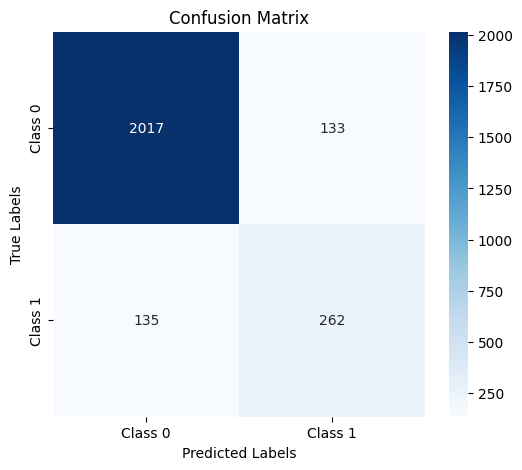

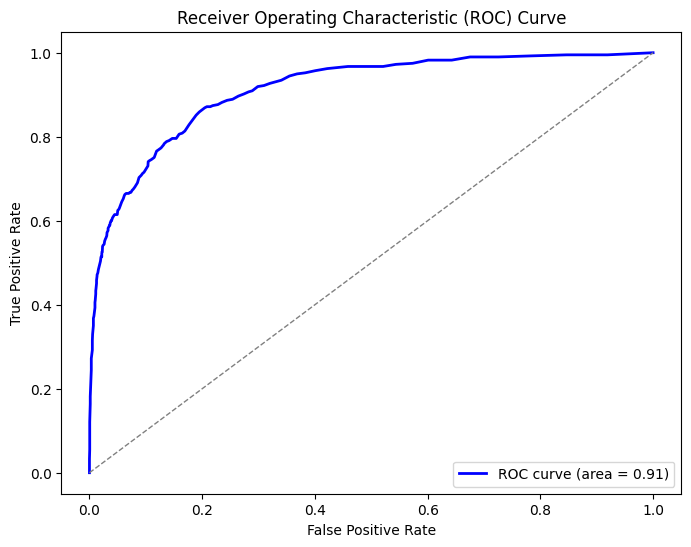

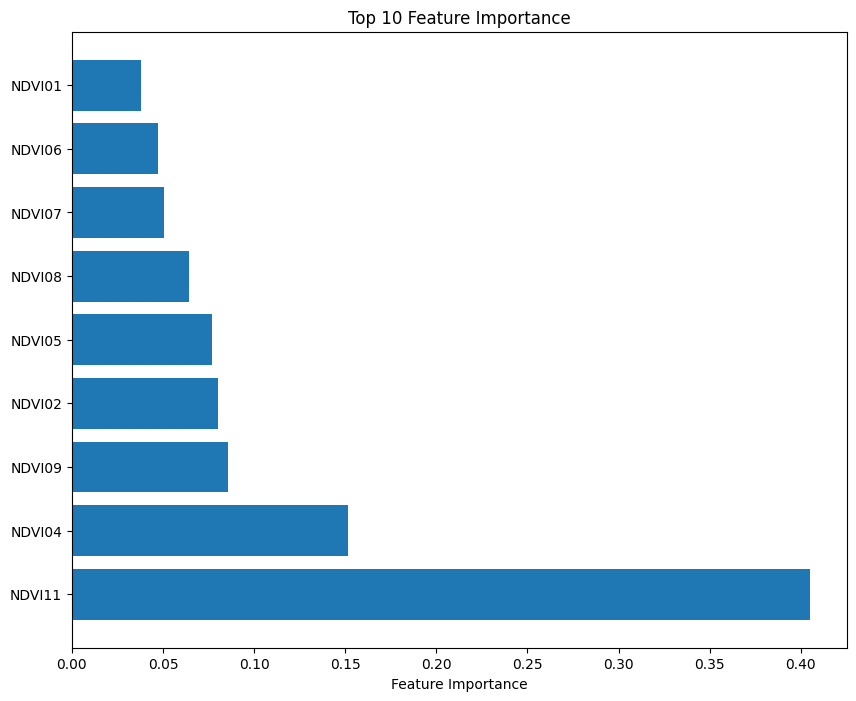

In [4]:
# Function to plot feature importance using Random Forest
def plot_feature_importance(model):
    # Get feature importances from the model
    importances = model.feature_importances_
    
    # Get the feature names
    feature_names = model.feature_names_in_
    
    # Sort the features by importance
    indices = importances.argsort()[::-1]
    
    # Plot the feature importance
    plt.figure(figsize=(10, 8))
    plt.barh(range(9), importances[indices][:9], align="center")
    plt.yticks(range(9), feature_names[indices][:9])
    plt.xlabel("Feature Importance")
    plt.title("Top 10 Feature Importance")
    plt.show()

# Function to perform training and testing
def train_test_model(train_data_1, train_data_2, test_data, label_column):
    # Concatenate train data from two years
    train_data = pd.concat([train_data_1, train_data_2])
    
    # Split features and labels
    X_train = train_data.drop(columns=[label_column])
    y_train = train_data[label_column]
    
    X_test = test_data.drop(columns=[label_column])
    y_test = test_data[label_column]
    
    # Initialize Random Forest classifier
    model = RandomForestClassifier(random_state=42, n_estimators=150, max_depth=None)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the test set results
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    
    # Evaluate the model
    evaluate_model(y_test, y_pred, y_prob)
    
    # Plot feature importance
    plot_feature_importance(model)

# Test case 1: Train on year_2021 and year_2022, test on year_2023_copy
print("Training on year_2021 and year_2022, Testing on year_2023_copy")
train_test_model(year_2021, year_2022, year_2023_copy, 'label')

# Test case 2: Train on year_2022 and year_2023, test on year_2022_copy
print("\nTraining on year_2021 and year_2023, Testing on year_2022_copy")
train_test_model(year_2021, year_2023, year_2022_copy, 'label')

# Test case 3: Train on year_2022 and year_2023, test on year_2021_copy
print("\nTraining on year_2022 and year_2023, Testing on year_2021_copy")
train_test_model(year_2022, year_2023, year_2021_copy, 'label')

## 5.2. Grid Search Cross Validation

The code defines a function to perform training and testing of a Random Forest model using GridSearchCV for hyperparameter optimization. It concatenates training data from two years, splits it into features and labels, and tunes the model with parameters like n_estimators, max_depth, and min_samples_leaf. The function then evaluates the model performance on the test set using accuracy, classification report, confusion matrix, and other metrics. Three test cases are provided, testing different year combinations for training and testing.

Training on year_2021 and year_2022, Testing on year_2023_copy
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters found by GridSearchCV:
{'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 150}
Accuracy: 0.9288677614520311
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     10689
           1       0.52      0.82      0.64       881

    accuracy                           0.93     11570
   macro avg       0.75      0.88      0.80     11570
weighted avg       0.95      0.93      0.94     11570



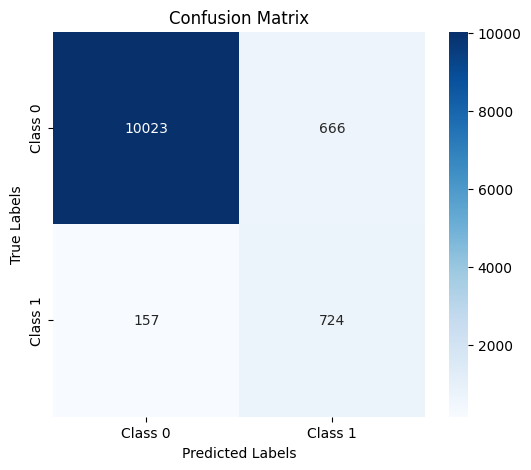

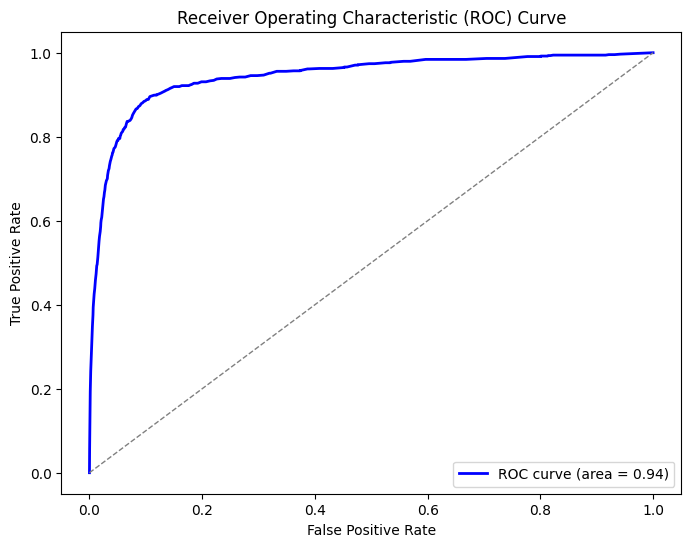


Training on year_2021 and year_2023, Testing on year_2022_copy
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters found by GridSearchCV:
{'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 150}
Accuracy: 0.843565341792623
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     11751
           1       0.91      0.46      0.61      4326

    accuracy                           0.84     16077
   macro avg       0.87      0.72      0.76     16077
weighted avg       0.85      0.84      0.82     16077



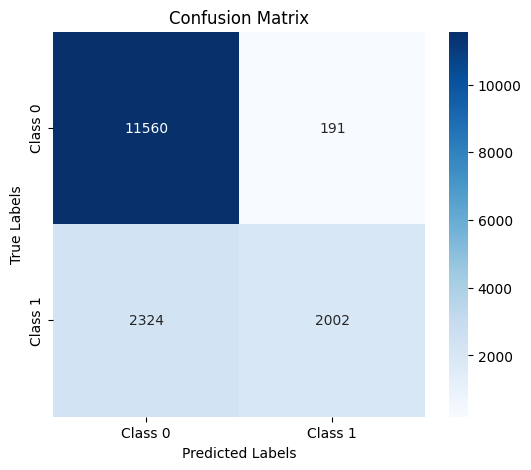

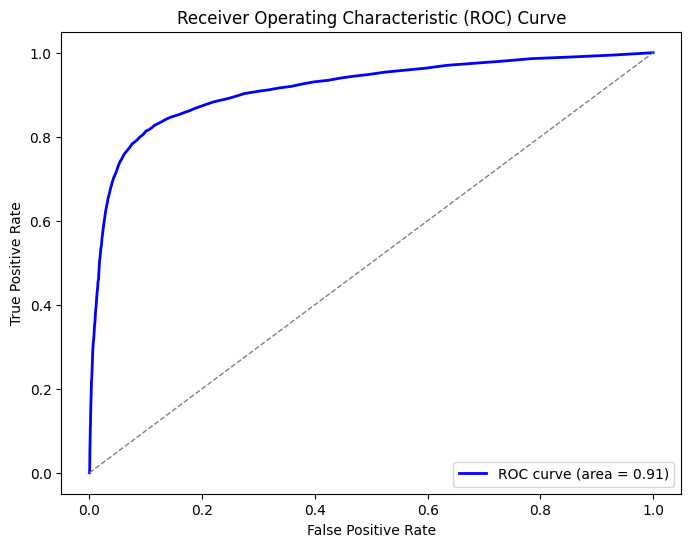


Training on year_2022 and year_2023, Testing on year_2021_copy
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters found by GridSearchCV:
{'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 100}
Accuracy: 0.8951707891637221
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2150
           1       0.67      0.65      0.66       397

    accuracy                           0.90      2547
   macro avg       0.80      0.80      0.80      2547
weighted avg       0.89      0.90      0.89      2547



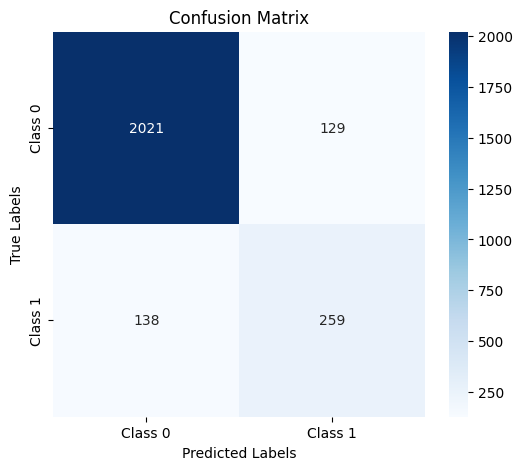

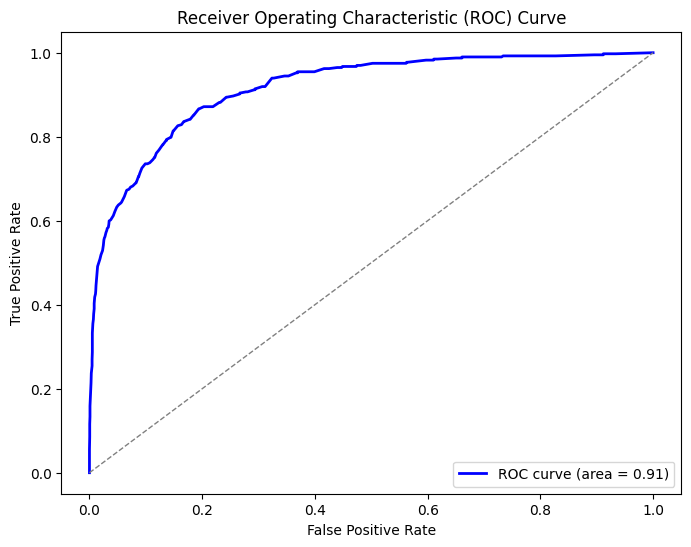

In [21]:
# Function to perform training and testing with GridSearchCV for Random Forest
def train_test_model_with_grid_search(train_data_1, train_data_2, test_data, label_column):
    # Concatenate train data from two years
    train_data = pd.concat([train_data_1, train_data_2])
    
    # Split features and labels
    X_train = train_data.drop(columns=[label_column])
    y_train = train_data[label_column]
    
    X_test = test_data.drop(columns=[label_column])
    y_test = test_data[label_column]
    
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 150],        # Number of trees
        'max_depth': [None, 10, 20, 30],       # Depth of trees
        'min_samples_leaf': [1, 2, 4]          # Minimum samples required to be at a leaf node
    }
    
    # Initialize Random Forest classifier
    model = RandomForestClassifier(random_state=42)
    
    # Initialize GridSearchCV with 5-fold cross-validation and parallel processing
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    
    # Train the model using GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters from GridSearchCV
    print("Best Parameters found by GridSearchCV:")
    print(grid_search.best_params_)
    
    # Train the model with the best parameters
    best_model = grid_search.best_estimator_
    
    # Predict the test set results
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)
    
    # Evaluate the model
    evaluate_model(y_test, y_pred, y_prob)

# Test case 1: Train on year_2021 and year_2022, test on year_2023_copy
print("Training on year_2021 and year_2022, Testing on year_2023_copy")
train_test_model_with_grid_search(year_2021, year_2022, year_2023_copy, 'label')

# Test case 2: Train on year_2022 and year_2023, test on year_2022_copy
print("\nTraining on year_2021 and year_2023, Testing on year_2022_copy")
train_test_model_with_grid_search(year_2021, year_2023, year_2022_copy, 'label')

# Test case 3: Train on year_2022 and year_2023, test on year_2021_copy
print("\nTraining on year_2022 and year_2023, Testing on year_2021_copy")
train_test_model_with_grid_search(year_2022, year_2023, year_2021_copy, 'label')


# 6. Bagging (Bootstrap Aggregation)

## 6.1. Simple Cross Validation

The code performs training and testing using a BaggingClassifier with a RandomForestClassifier as its base estimator. The training data from two years is concatenated and then used to train the model. The model's predictions are evaluated, and feature importances are plotted based on the BaggingClassifier's estimators. The function plot_feature_importance calculates the average importance across all base estimators in the BaggingClassifier and displays the top 10 important features. Three test cases are included for different combinations of training and testing years.








Training on year_2021 and year_2022, Testing on year_2023_copy
Accuracy: 0.9283491789109767
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     10689
           1       0.52      0.83      0.64       881

    accuracy                           0.93     11570
   macro avg       0.75      0.88      0.80     11570
weighted avg       0.95      0.93      0.94     11570



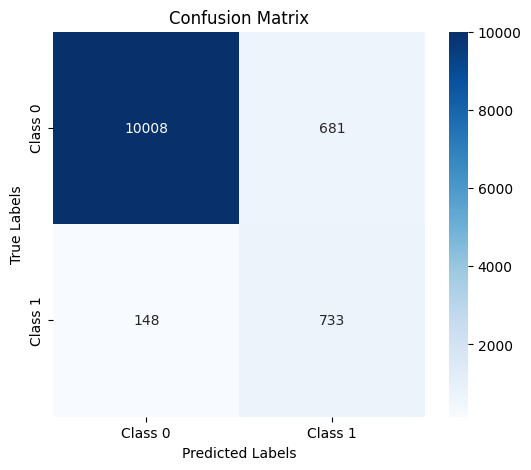

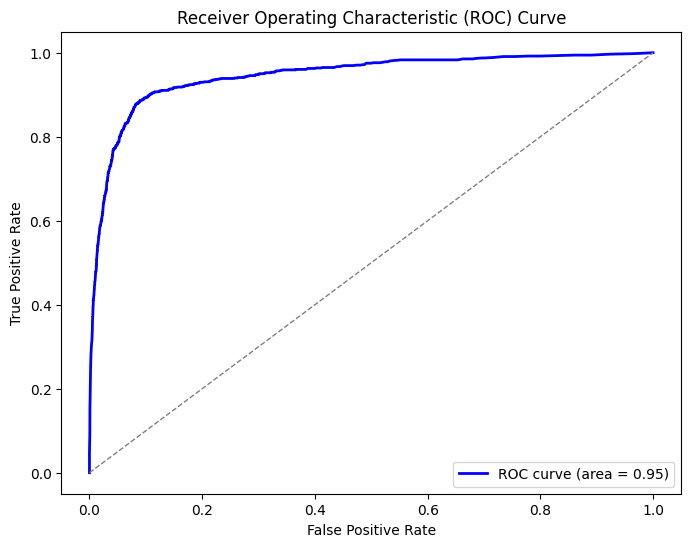

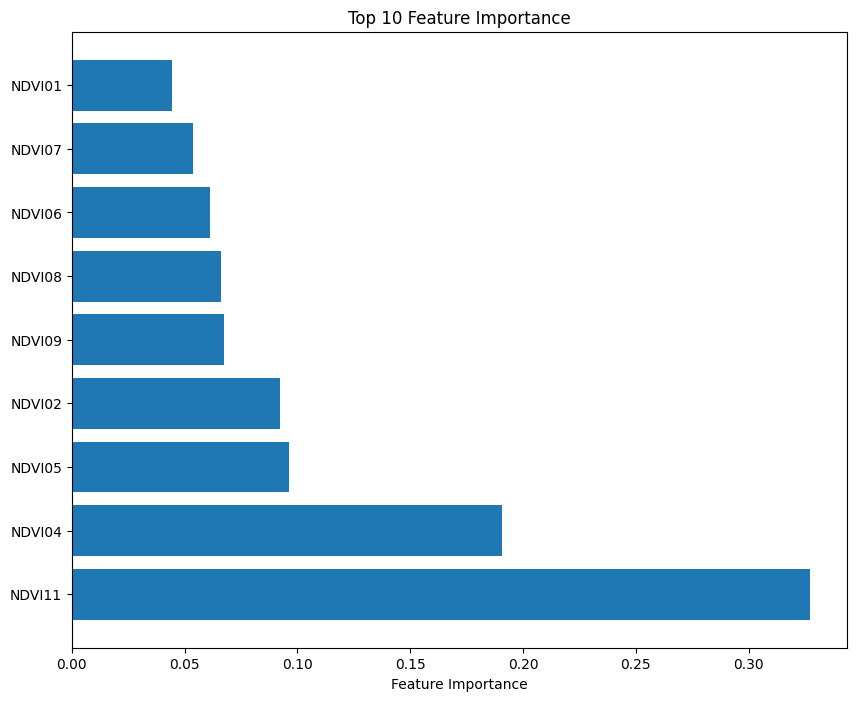


Training on year_2021 and year_2023, Testing on year_2022_copy
Accuracy: 0.8530820426696523
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91     11751
           1       0.91      0.50      0.65      4326

    accuracy                           0.85     16077
   macro avg       0.88      0.74      0.78     16077
weighted avg       0.86      0.85      0.84     16077



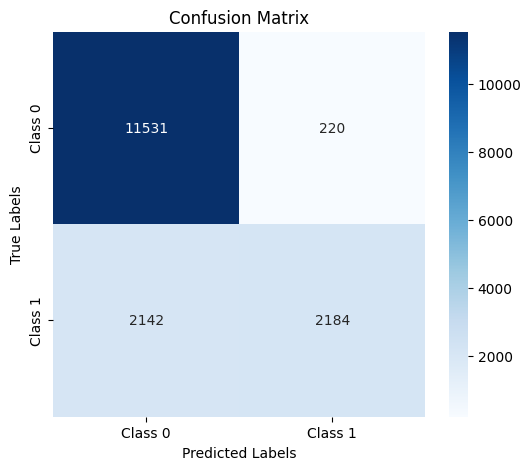

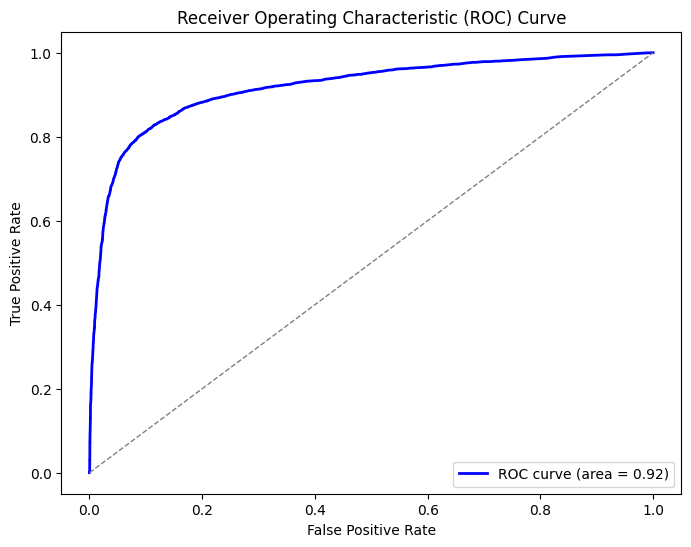

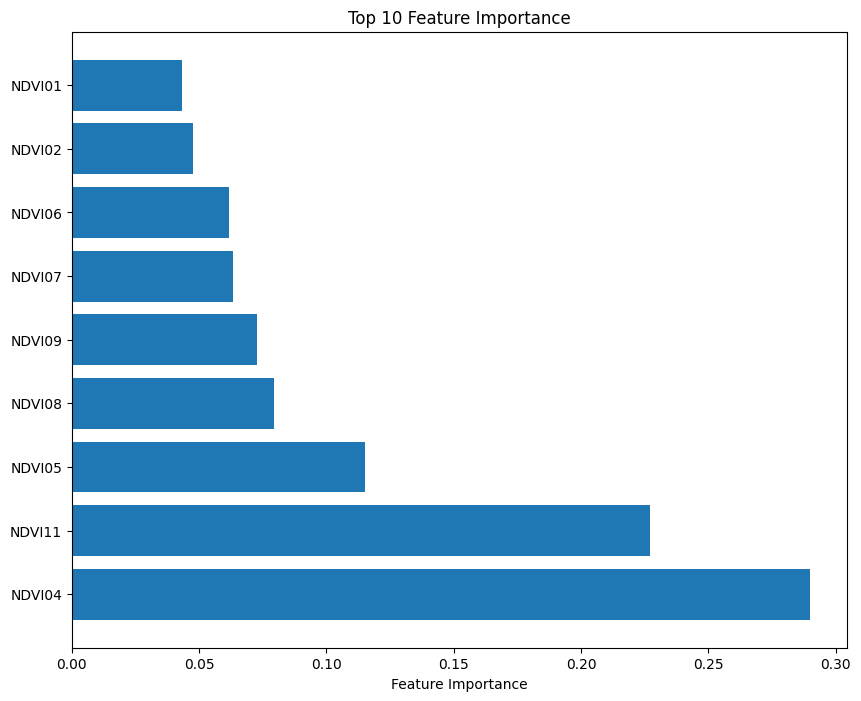


Training on year_2022 and year_2023, Testing on year_2021_copy
Accuracy: 0.8939929328621908
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2150
           1       0.66      0.66      0.66       397

    accuracy                           0.89      2547
   macro avg       0.80      0.80      0.80      2547
weighted avg       0.89      0.89      0.89      2547



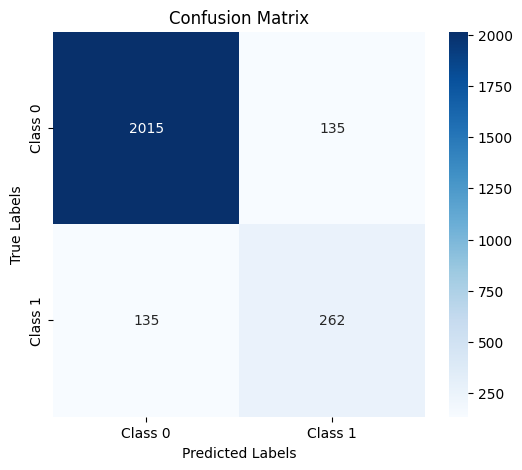

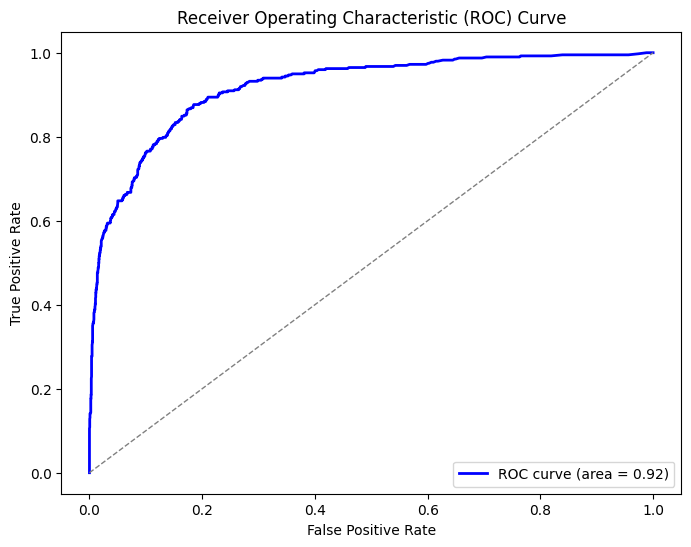

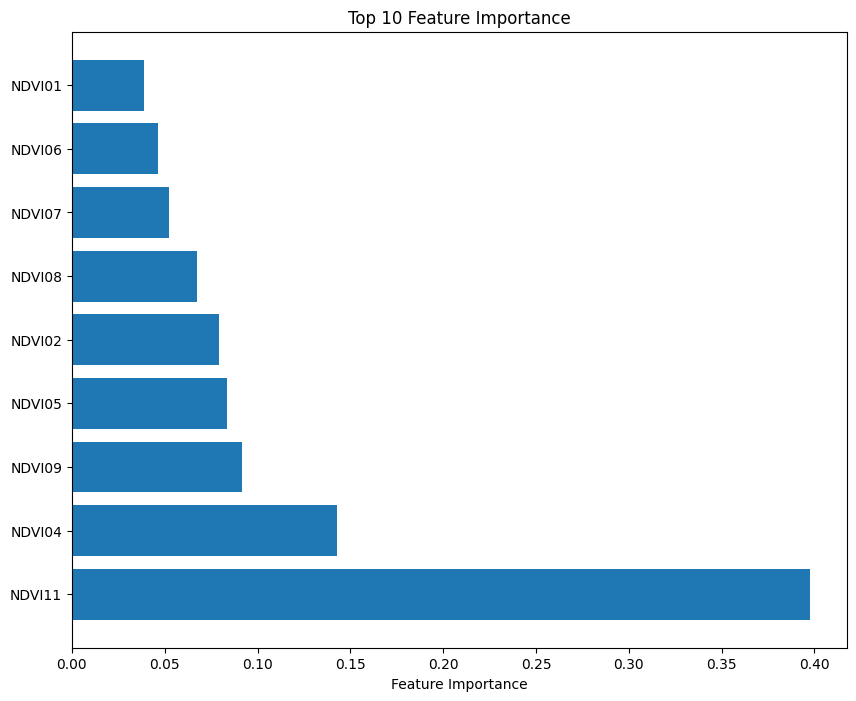

In [5]:
# Function to plot feature importance using Random Forest
def plot_feature_importance(model, X_train):
    # Initialize an array to accumulate feature importances
    importances = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': [0] * len(X_train.columns)
    })
    
    # Extract feature importances from each base estimator
    for estimator in model.estimators_:
        importances['Importance'] += estimator.feature_importances_
    
    # Normalize by the number of base estimators
    importances['Importance'] /= len(model.estimators_)
    
    # Sort the features by importance
    importances = importances.sort_values(by='Importance', ascending=False)
    
    # Plot the top 10 feature importance
    plt.figure(figsize=(10, 8))
    plt.barh(range(9), importances['Importance'][:9], align="center")
    plt.yticks(range(9), importances['Feature'][:9])
    plt.xlabel("Feature Importance")
    plt.title("Top 10 Feature Importance")
    plt.show()

# Function to perform training and testing
def train_test_model(train_data_1, train_data_2, test_data, label_column):
    # Concatenate train data from two years
    train_data = pd.concat([train_data_1, train_data_2])
    
    # Split features and labels
    X_train = train_data.drop(columns=[label_column])
    y_train = train_data[label_column]
    
    X_test = test_data.drop(columns=[label_column])
    y_test = test_data[label_column]
    
    # Initialize Bagging classifier with Random Forest as base estimator
    model = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=10, max_depth=None, random_state=42), 
                             n_estimators=50, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the test set results
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    
    # Evaluate the model
    evaluate_model(y_test, y_pred, y_prob)
    
    # Plot feature importance from BaggingClassifier
    plot_feature_importance(model, X_train)

# Test case 1: Train on year_2021 and year_2022, test on year_2023_copy
print("Training on year_2021 and year_2022, Testing on year_2023_copy")
train_test_model(year_2021, year_2022, year_2023_copy, 'label')

# Test case 2: Train on year_2022 and year_2023, test on year_2022_copy
print("\nTraining on year_2021 and year_2023, Testing on year_2022_copy")
train_test_model(year_2021, year_2023, year_2022_copy, 'label')

# Test case 3: Train on year_2022 and year_2023, test on year_2021_copy
print("\nTraining on year_2022 and year_2023, Testing on year_2021_copy")
train_test_model(year_2022, year_2023, year_2021_copy, 'label')

## 6.2. Grid Search Cross Validation

This code trains and tests a BaggingClassifier using GridSearchCV to optimize hyperparameters, such as the number of estimators and the maximum depth of individual trees. It evaluates the model performance across three test cases using different training and testing data combinations.

Training on year_2021 and year_2022, Testing on year_2023_copy
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters found by GridSearchCV:
{'estimator': RandomForestClassifier(max_depth=30, n_estimators=10, random_state=42), 'n_estimators': 50}
Accuracy: 0.9285220397579949
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     10689
           1       0.52      0.83      0.64       881

    accuracy                           0.93     11570
   macro avg       0.75      0.88      0.80     11570
weighted avg       0.95      0.93      0.94     11570



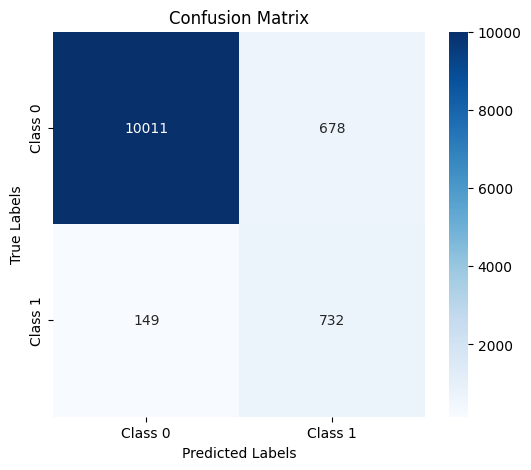

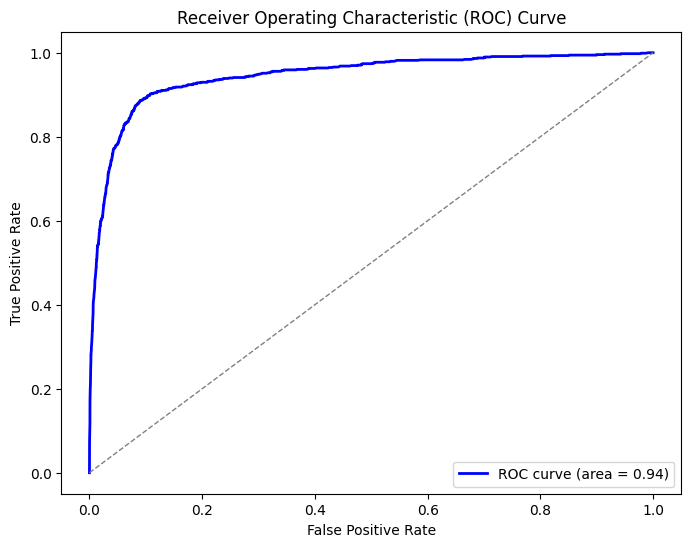


Training on year_2021 and year_2023, Testing on year_2022_copy
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters found by GridSearchCV:
{'estimator': RandomForestClassifier(max_depth=30, n_estimators=10, random_state=42), 'n_estimators': 50}
Accuracy: 0.8536418486035952
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91     11751
           1       0.91      0.51      0.65      4326

    accuracy                           0.85     16077
   macro avg       0.88      0.74      0.78     16077
weighted avg       0.86      0.85      0.84     16077



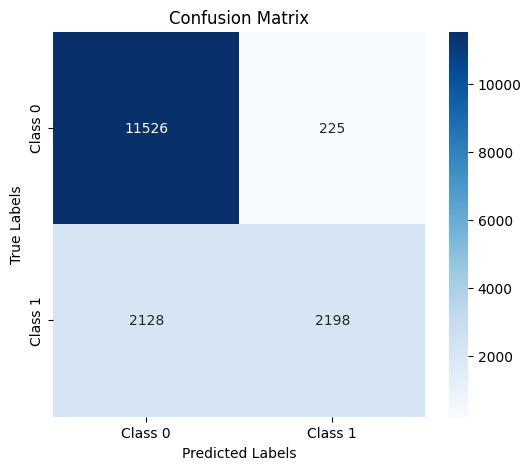

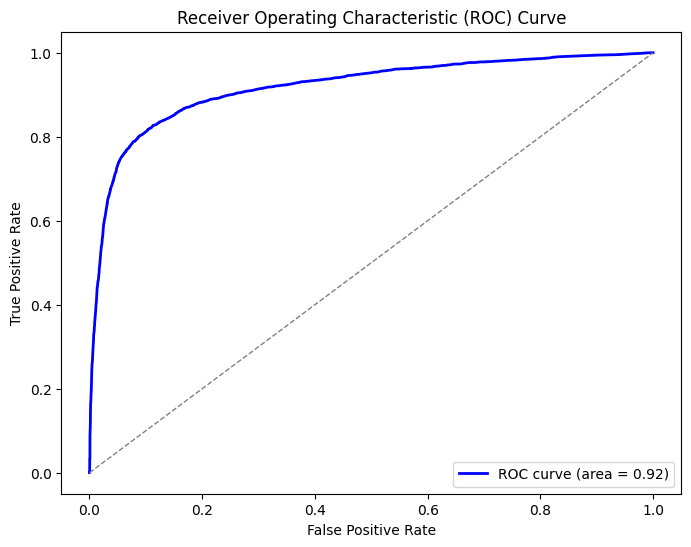


Training on year_2022 and year_2023, Testing on year_2021_copy
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters found by GridSearchCV:
{'estimator': RandomForestClassifier(max_depth=30, n_estimators=10, random_state=42), 'n_estimators': 50}
Accuracy: 0.8936003140950137
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2150
           1       0.66      0.66      0.66       397

    accuracy                           0.89      2547
   macro avg       0.80      0.80      0.80      2547
weighted avg       0.89      0.89      0.89      2547



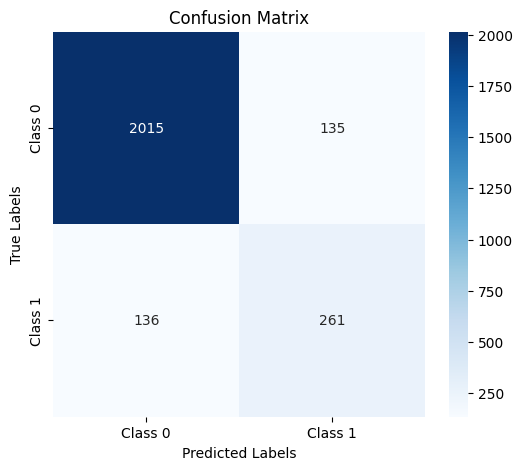

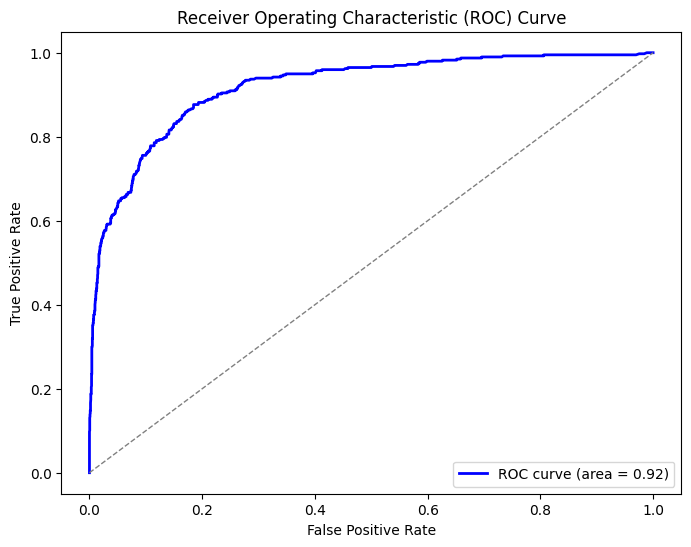

In [20]:
# Function to plot feature importance using Random Forest
def plot_feature_importance(model, X_train):
    # Initialize an array to accumulate feature importances
    importances = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': [0] * len(X_train.columns)
    })
    
    # Extract feature importances from each base estimator
    for estimator in model.estimators_:
        importances['Importance'] += estimator.feature_importances_
    
    # Normalize by the number of base estimators
    importances['Importance'] /= len(model.estimators_)
    
    # Sort the features by importance
    importances = importances.sort_values(by='Importance', ascending=False)
    
    # Plot the top 10 feature importance
    plt.figure(figsize=(10, 8))
    plt.barh(range(9), importances['Importance'][:9], align="center")
    plt.yticks(range(9), importances['Feature'][:9])
    plt.xlabel("Feature Importance")
    plt.title("Top 10 Feature Importance")
    plt.show()
    
# Suppress all warnings
warnings.filterwarnings("ignore")

# Function to perform training and testing with GridSearchCV for BaggingClassifier
def train_test_model_with_grid_search(train_data_1, train_data_2, test_data, label_column):
    # Concatenate train data from two years
    train_data = pd.concat([train_data_1, train_data_2])
    
    # Split features and labels
    X_train = train_data.drop(columns=[label_column])
    y_train = train_data[label_column]
    
    X_test = test_data.drop(columns=[label_column])
    y_test = test_data[label_column]
    
    # Define multiple base estimators for the grid search
    base_estimators = [
        RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42),
        RandomForestClassifier(n_estimators=10, max_depth=20, random_state=42),
        RandomForestClassifier(n_estimators=10, max_depth=30, random_state=42),
        RandomForestClassifier(n_estimators=10, max_depth=35, random_state=42),
    ]
    
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 150],  # Number of base estimators in the BaggingClassifier
        'estimator': base_estimators     # Multiple base estimators with varying configurations
    }
    
    # Initialize BaggingClassifier with parallelism
    model = BaggingClassifier(random_state=42, n_jobs=-1)
    
    # Initialize GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    
    # Train the model using GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters from GridSearchCV
    print("Best Parameters found by GridSearchCV:")
    print(grid_search.best_params_)
    
    # Train the model with the best parameters
    best_model = grid_search.best_estimator_
    
    # Predict the test set results
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)
    
    # Evaluate the model
    evaluate_model(y_test, y_pred, y_prob)

# Test case 1: Train on year_2021 and year_2022, test on year_2023_copy
print("Training on year_2021 and year_2022, Testing on year_2023_copy")
train_test_model_with_grid_search(year_2021, year_2022, year_2023_copy, 'label')

# Test case 2: Train on year_2022 and year_2023, test on year_2022_copy
print("\nTraining on year_2021 and year_2023, Testing on year_2022_copy")
train_test_model_with_grid_search(year_2021, year_2023, year_2022_copy, 'label')

# Test case 3: Train on year_2022 and year_2023, test on year_2021_copy
print("\nTraining on year_2022 and year_2023, Testing on year_2021_copy")
train_test_model_with_grid_search(year_2022, year_2023, year_2021_copy, 'label')


# 7. Support Vector Machine (SVM)

## 7.1. Simple Cross Validation

This code trains and tests a Random Forest classifier on concatenated training data from two years and evaluates its performance on a separate test dataset. It also plots the top 10 feature importances to visualize the most significant features for prediction. The function is tested on three cases involving different combinations of training and testing datasets.

Training on year_2021 and year_2022, Testing on year_2023_copy
Accuracy: 0.9101123595505618
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     10689
           1       0.45      0.83      0.59       881

    accuracy                           0.91     11570
   macro avg       0.72      0.88      0.77     11570
weighted avg       0.94      0.91      0.92     11570



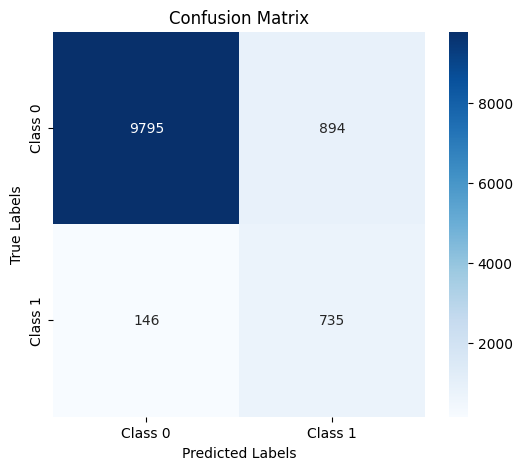

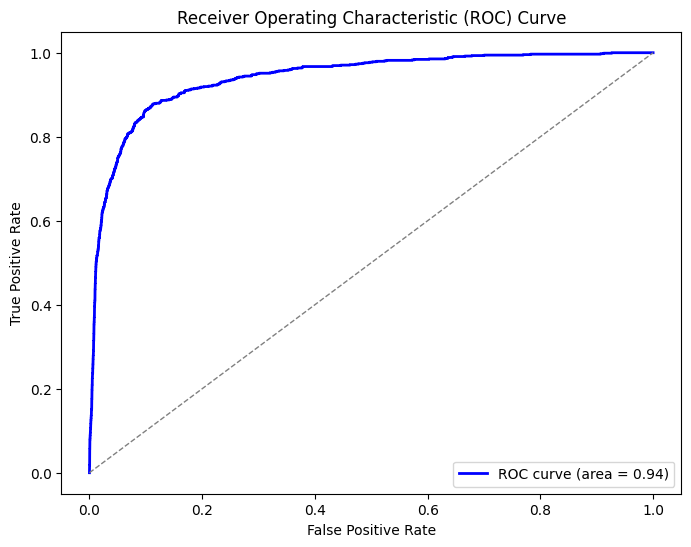


Training on year_2021 and year_2023, Testing on year_2022_copy
Accuracy: 0.8458667661877216
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     11751
           1       0.74      0.67      0.70      4326

    accuracy                           0.85     16077
   macro avg       0.81      0.79      0.80     16077
weighted avg       0.84      0.85      0.84     16077



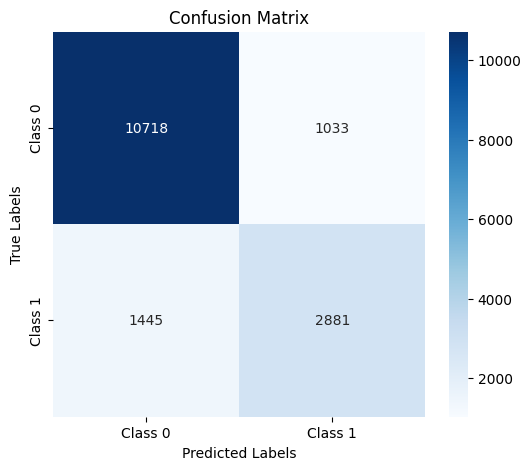

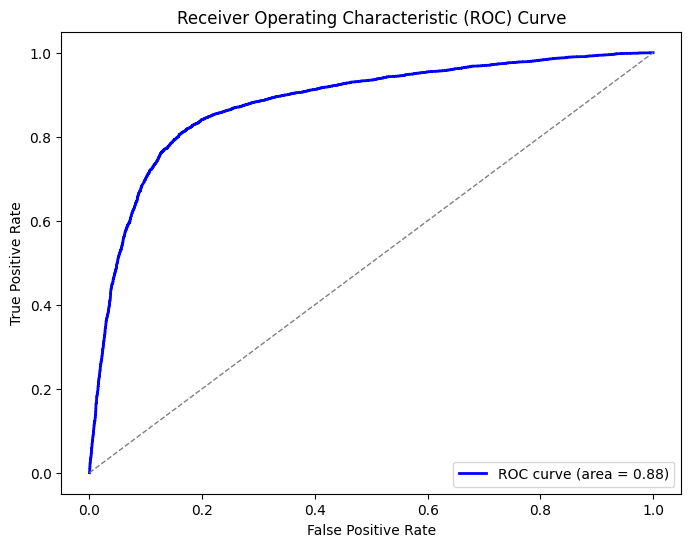


Training on year_2022 and year_2023, Testing on year_2021_copy
Accuracy: 0.8708284255987436
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2150
           1       0.58      0.63      0.60       397

    accuracy                           0.87      2547
   macro avg       0.75      0.77      0.76      2547
weighted avg       0.88      0.87      0.87      2547



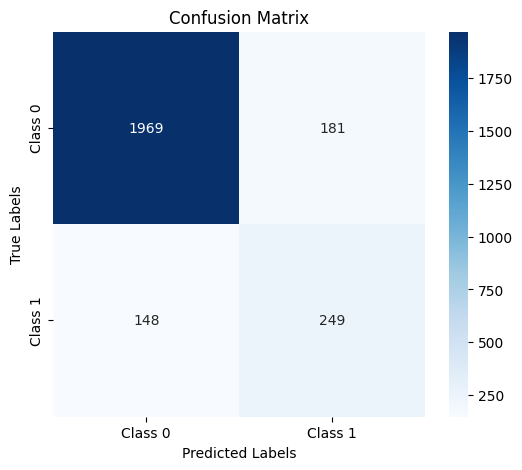

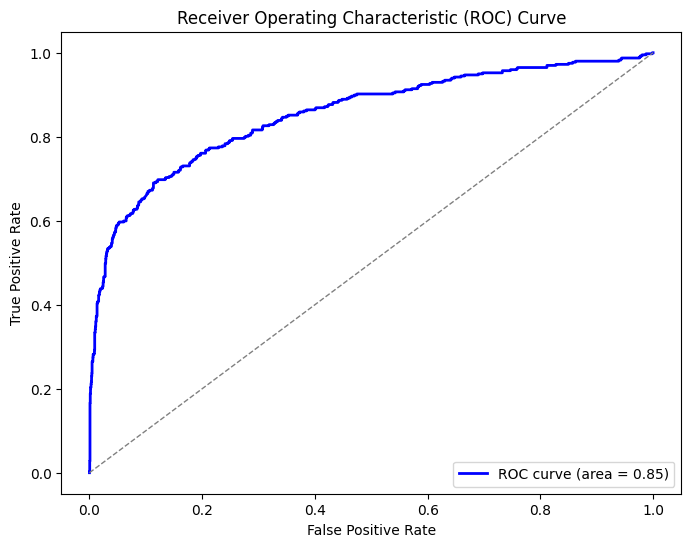

In [17]:
# Suppress all warnings
warnings.filterwarnings("ignore")


# Function to perform training and testing
def train_test_model_with_svm(train_data_1, train_data_2, test_data, label_column):
    # Concatenate train data from two years
    train_data = pd.concat([train_data_1, train_data_2])
    
    # Split features and labels
    X_train = train_data.drop(columns=[label_column])
    y_train = train_data[label_column]
    
    X_test = test_data.drop(columns=[label_column])
    y_test = test_data[label_column]
    
    # Initialize SVM classifier with specified hyperparameters
    svc = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=42)
    
    # Train the model
    svc.fit(X_train, y_train)
    
    # Predict the test set results
    y_pred = svc.predict(X_test)
    y_prob = svc.predict_proba(X_test)
    
    # Evaluate the model
    evaluate_model(y_test, y_pred, y_prob)

# Test case 1: Train on year_2021 and year_2022, test on year_2023_copy
print("Training on year_2021 and year_2022, Testing on year_2023_copy")
train_test_model_with_svm(year_2021, year_2022, year_2023_copy, 'label')

# Test case 2: Train on year_2021 and year_2023, test on year_2022_copy
print("\nTraining on year_2021 and year_2023, Testing on year_2022_copy")
train_test_model_with_svm(year_2021, year_2023, year_2022_copy, 'label')

# Test case 3: Train on year_2022 and year_2023, test on year_2021_copy
print("\nTraining on year_2022 and year_2023, Testing on year_2021_copy")
train_test_model_with_svm(year_2022, year_2023, year_2021_copy, 'label')

## 7.2. Grid Search Cross Validation

The code performs hyperparameter tuning for an SVM model using GridSearchCV, testing different regularization (C), gamma values, and kernel types. It trains on data from two years and evaluates the model on a third year’s dataset, reporting the best hyperparameters and model performance metrics.

Training on year_2021 and year_2022, Testing on year_2023_copy
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.8840968020743302
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     10689
           1       0.38      0.82      0.52       881

    accuracy                           0.88     11570
   macro avg       0.68      0.85      0.73     11570
weighted avg       0.94      0.88      0.90     11570



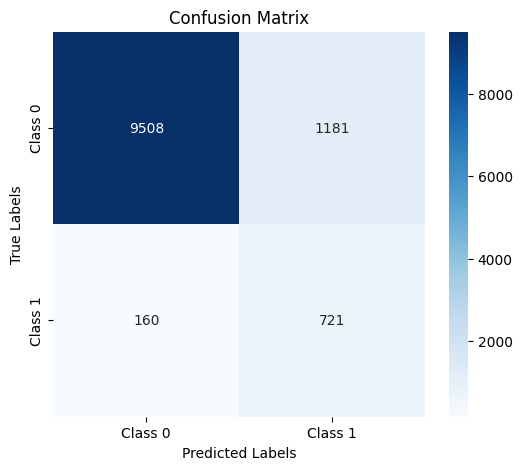

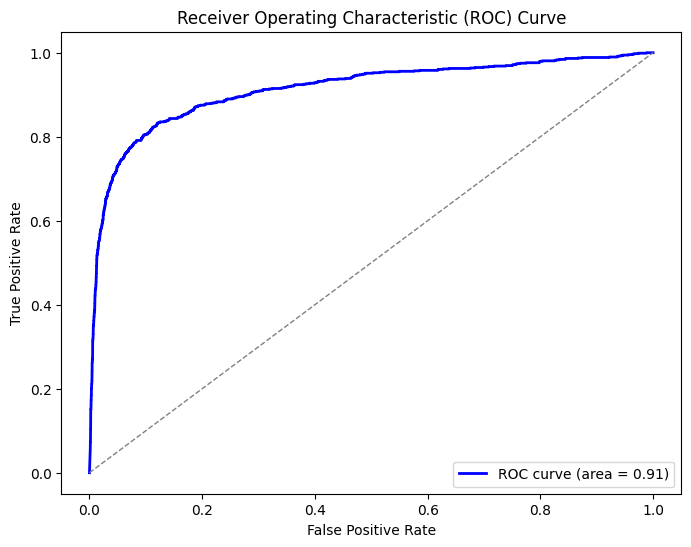


Training on year_2021 and year_2023, Testing on year_2022_copy
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.8035081171860422
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     11751
           1       0.66      0.57      0.61      4326

    accuracy                           0.80     16077
   macro avg       0.75      0.73      0.74     16077
weighted avg       0.80      0.80      0.80     16077



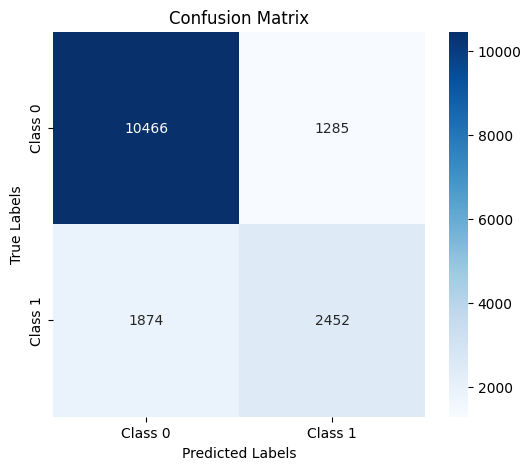

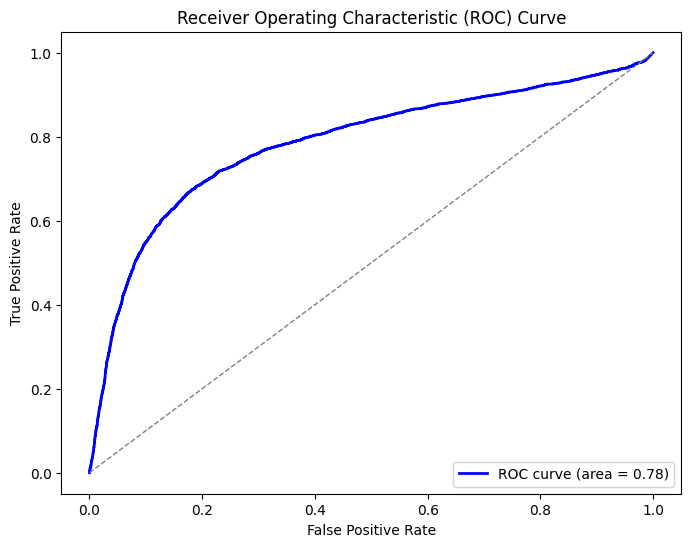


Training on year_2022 and year_2023, Testing on year_2021_copy
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.8248920298390263
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2150
           1       0.45      0.60      0.52       397

    accuracy                           0.82      2547
   macro avg       0.69      0.73      0.70      2547
weighted avg       0.85      0.82      0.83      2547



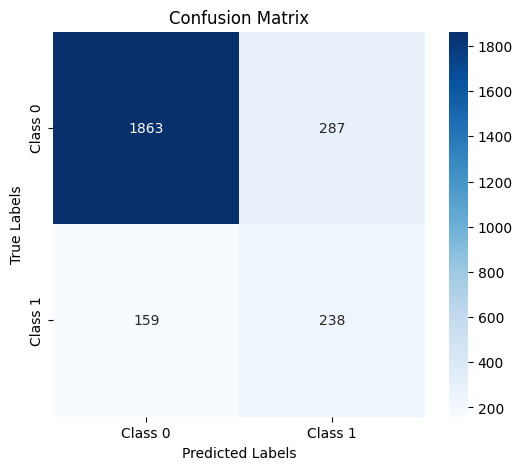

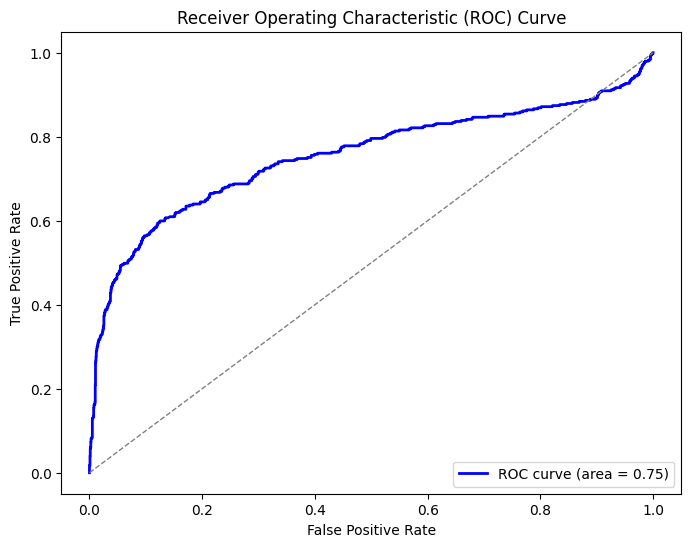

In [22]:

# Function to perform GridSearchCV for SVM
def grid_search_svm(train_data_1, train_data_2, test_data, label_column):
    # Concatenate train data from two years
    train_data = pd.concat([train_data_1, train_data_2])
    
    # Split features and labels
    X_train = train_data.drop(columns=[label_column])
    y_train = train_data[label_column]
    
    X_test = test_data.drop(columns=[label_column])
    y_test = test_data[label_column]
    
    # Set up the parameter grid for GridSearchCV
    param_grid = {
        'C': [ 10, 100],  # Regularization parameter
        'gamma': [ 0.1, 1],  # Gamma for RBF kernel
        'kernel': [ 'rbf', 'poly']  # SVM kernels
    }
    
    # Initialize the SVM model
    svm_model = SVC(probability=True, random_state=42)
    
    # Initialize GridSearchCV with parallelism
    grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
    
    # Perform GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Best hyperparameters from grid search
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    
    # Get the best model from grid search
    best_model = grid_search.best_estimator_
    
    # Predict the test set results
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)
    
    # Evaluate the model
    evaluate_model(y_test, y_pred, y_prob)
    


# Test case 1: Train on year_2021 and year_2022, test on year_2023_copy
print("Training on year_2021 and year_2022, Testing on year_2023_copy")
grid_search_svm(year_2021, year_2022, year_2023_copy, 'label')

# Test case 2: Train on year_2021 and year_2023, test on year_2022_copy
print("\nTraining on year_2021 and year_2023, Testing on year_2022_copy")
grid_search_svm(year_2021, year_2023, year_2022_copy, 'label')

# Test case 3: Train on year_2022 and year_2023, test on year_2021_copy
print("\nTraining on year_2022 and year_2023, Testing on year_2021_copy")
grid_search_svm(year_2022, year_2023, year_2021_copy, 'label')
